In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import os

In [2]:
# data

path = os.getcwd()
drama = pd.read_csv(path+'/drama.csv',sep=',')
drama.head()

,드라마,날짜,회차,요일,배우,CPI,CPI증감률,경제성장률,실업률,미세먼지,연출자,작가,특이사항,시청률
0,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.02.25,1,0,75,96.436,2.9,0.7,4.2,47,5,10,0,22.3
1,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.02.26,2,1,75,96.436,2.9,0.7,4.2,47,5,10,0,28.9
2,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.03.03,3,0,75,96.436,2.9,0.7,3.7,43,5,10,0,25.7
3,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.03.04,4,1,75,96.436,2.9,0.7,3.7,43,5,10,0,29.9
4,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.03.10,5,0,75,96.436,2.9,0.7,3.7,43,5,10,0,26.9


In [3]:
drama.pop('드라마')
drama.pop('날짜')
drama.pop('CPI')
drama.pop('CPI증감률')

0      2.9
1      2.9
2      2.9
3      2.9
4      2.9
      ... 
779   -0.3
780   -0.3
781   -0.3
782   -0.3
783   -0.3
Name: CPI증감률, Length: 784, dtype: float64

In [4]:
drama.rename(columns={'회차': 'Episode', '요일': 'Day', '배우': 'Actor', '경제성장률': 'GDP' , '실업률' : 'Job',  '미세먼지': 'Dust',
                     '연출자': 'Director', '작가': 'Author', '특이사항': 'Exception', '시청률': 'Rate'}, inplace=True)

In [5]:
print(drama.shape)
drama.head()
drama.iloc[:,2:-2]

(784, 10)


,Actor,GDP,Job,Dust,Director,Author
0,75,0.7,4.2,47,5,10
1,75,0.7,4.2,47,5,10
2,75,0.7,3.7,43,5,10
3,75,0.7,3.7,43,5,10
4,75,0.7,3.7,43,5,10
...,...,...,...,...,...,...
779,63,1.0,3.0,24,3,6
780,63,1.0,3.0,24,3,6
781,63,1.0,3.0,24,3,6
782,63,1.0,3.0,24,3,6


# PreProcessing

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(drama.iloc[:,2:-2])
X_scaled = scaler.transform(drama.iloc[:,2:-2])
np.mean(X_scaled), np.std(X_scaled)
drama.iloc[:,2:-2] = X_scaled

X = drama.values[:,:-1]
y = drama.iloc[:,-1:].values

X.shape, y.shape

((784, 9), (784, 1))

In [7]:
mean = 29.29
y_label = np.zeros(784)

for i in range(784):
    if y[i] > mean :
        y_label[i] = 1 # 흥행 성공
        
y_label.sum() # 저랑 숫자가 달라서 여쭤봅니다.

349.0

# Train_Test_Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_label, test_size = 0.25, random_state = 777)

print(
    
    X_train.shape,
    X_test.shape,
    y_train.shape,
    y_test.shape
)

(588, 9) (196, 9) (588,) (196,)


# Logisitc Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression()

classifier.fit(X_train,y_train)

expected = y_test
predicted = classifier.predict(X_test)

print('\nLR Confusion Matrix:\n',
     metrics.confusion_matrix(expected,predicted))
print(metrics.classification_report(expected,predicted))


LR Confusion Matrix:
 [[100  11]
 [ 12  73]]
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       111
         1.0       0.87      0.86      0.86        85

    accuracy                           0.88       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.88      0.88      0.88       196



/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train)
# logit = sm.Logit(y_train.astype(np.float), X_train.astype(np.float))

result = logit.fit()

print(result.summary())
print("####x1:num, x2:day, x3:actor, x4:GDP, x5:job, x6:dust, x7:director, x8:author, x9:spe####")

Optimization terminated successfully.
         Current function value: 0.512301
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  588
Model:                          Logit   Df Residuals:                      579
Method:                           MLE   Df Model:                            8
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:                  0.2553
Time:                        19:18:13   Log-Likelihood:                -301.23
converged:                       True   LL-Null:                       -404.50
Covariance Type:            nonrobust   LLR p-value:                 2.669e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0034      0.005      0.737      0.461      -0.006       0.012
x2             0.6680      0.

# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

classifier = RandomForestClassifier(
    n_estimators = 50, # 약한 학습기의 개수
    max_depth = 5, # 모델의 최대 깊이
    criterion = 'gini' # 결정 트리 알고리즘
)

classifier.fit(X_train,y_train)

expected = y_test
predicted = classifier.predict(X_test)

print('\nRF Confusion Matrix:\n',
     metrics.confusion_matrix(expected,predicted))
print(metrics.classification_report(expected,predicted))


RF Confusion Matrix:
 [[104   7]
 [  9  76]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       111
         1.0       0.92      0.89      0.90        85

    accuracy                           0.92       196
   macro avg       0.92      0.92      0.92       196
weighted avg       0.92      0.92      0.92       196



특성 중요도 : 
[0.32290664 0.14513033 0.16821986 0.02555861 0.04018303 0.06900925
 0.08789157 0.13662959 0.00447113]
####x1:num, x2:day, x3:actor, x4:GDP, x5:job, x6:dust, x7:director, x8:author, x9:spe####


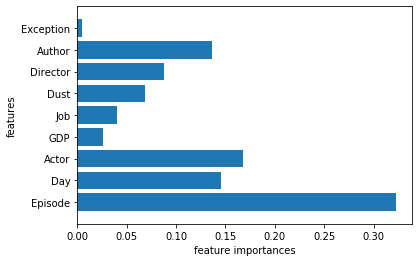

In [22]:
# 특성 중요도

print("특성 중요도 : \n{}".format(classifier.feature_importances_))



# 특성 중요도 시각화 하기

def plot_feature_importances_drama(classifier):

    n_features = drama.shape[1]-1

    plt.barh(range(n_features), classifier.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), drama.columns)

    plt.xlabel("feature importances")

    plt.ylabel("features")

    plt.ylim(-1, n_features)

plt.show()
print("####x1:num, x2:day, x3:actor, x4:GDP, x5:job, x6:dust, x7:director, x8:author, x9:spe####")
plot_feature_importances_drama(classifier)

# SVM

In [14]:
from sklearn.svm import SVC

classifier = SVC(
    kernel='linear'
#     C=1, # 페널티 파라미터 - 어느 정도 오류 분류를 허용
#     gamma = 0.001 # 큰 값이 설정되면 복잡한 분리 곡면을 지정
)
classifier.fit(X_train,y_train)

expected = y_test
predicted = classifier.predict(X_test)

# 성능평가
print('\nSVC Confusion Matrix:\n',
     metrics.confusion_matrix(expected, predicted))
print(metrics.classification_report(expected,predicted))


SVC Confusion Matrix:
 [[104   7]
 [ 12  73]]
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       111
         1.0       0.91      0.86      0.88        85

    accuracy                           0.90       196
   macro avg       0.90      0.90      0.90       196
weighted avg       0.90      0.90      0.90       196



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('\nCoefficient:\n',model.coef_)
print("\nx1:Episode, x2:Day, x3:Actor, x4:GDP, x5:Job, x6:Dust, x7:Director, x8:Author, x9:Exception\n")
print('\nIntercept:\n',model.intercept_)
print('\nR2-Score\n:', model.score(X_test,y_test))
print('\nMSE\n:', mean_squared_error(y_test, y_pred, multioutput='raw_values'))


Coefficient:
 [ 0.01503176  0.33454687  0.33391867 -0.0004782  -0.00173324  0.07479977
 -0.0516248  -0.03716395 -0.16731111]

x1:Episode, x2:Day, x3:Actor, x4:GDP, x5:Job, x6:Dust, x7:Director, x8:Author, x9:Exception


Intercept:
 -0.11387114788899494

R2-Score
: 0.5695619504603149

MSE
: [0.10571593]


=============================================================================================
LR Accuracy: 0.89
LR F1 : 0.87
Logistic Regression에서는 
x3:Actor, x1:Episode, x2:Day, x6:Dust 의 coef가 상당가 매우 크고 p-value가 낮음

RF Accuracy: 0.91
RF F1 : 0.90
Random Forest는 
x1:Episode, x3:Actor, x2:Day, x8:Author 순으로 Feature Importance가 나옴

=> 상위 3개는 같고 4번째는 다름

어떤 점에서 비슷한 모양이 나올까 궁금해서 linear SVC을 사용해봄

SVC Accuracy : 0.90
SVC F1 : 0.88
=> linear kernel을 했을 때, accuracy가 상당히 높은거로 봐서 linear한 관계가 있음을 알 수 있음

좀 더 확실하게 확정짓고 싶어서 Linear Regression 실행
x3:Actor x1:Episode x2:Day x6:Dust의 순서로 coef의 크기가 큼 => 시청률과 각 변수는 확실하게 선형적인 관계가 있음을 확인